# Import the Modules

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.cluster import KMeans

# Explaratory Data Analysis (EDA)

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.isnull().any()
# There is no missing data in the dataset

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
df.info()
# We have 200 rows of data in total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()
# Simplify the column name

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


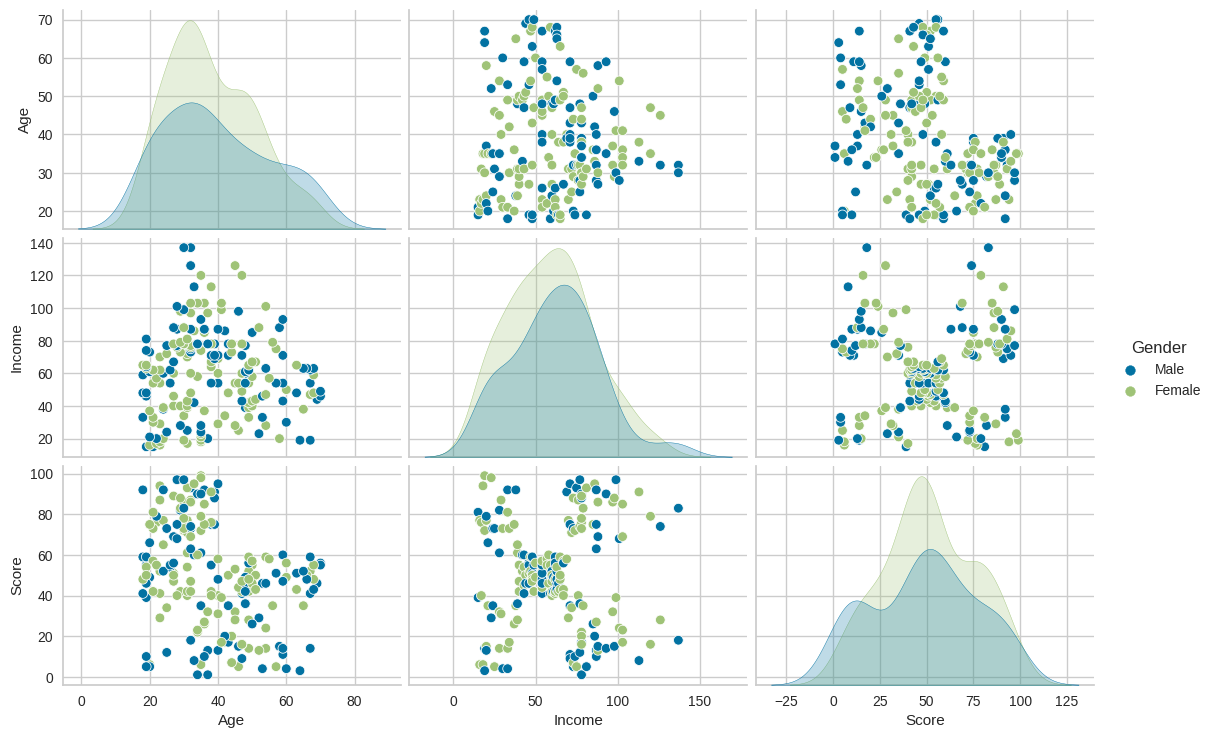

In [ ]:
# Let's see our data in a detailed way with a pairplot
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

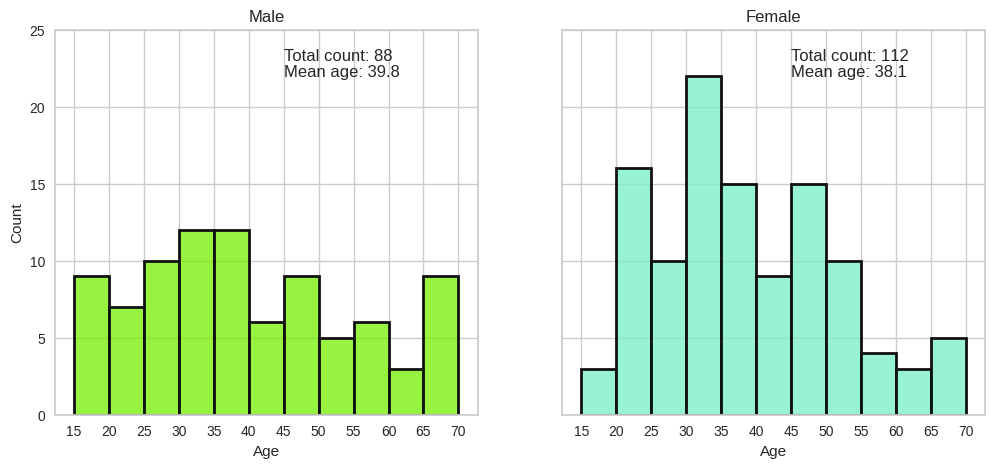

In [ ]:
# Let's see more detail about the age based on the gender

male_age = df[df['Gender']=='Male']['Age']
female_age = df[df['Gender']=='Female']['Age']

age_bins = range(15,75,5)

# Male histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.histplot(male_age, bins=age_bins, kde=False, color='#76EE00', ax=ax1, edgecolor="k", linewidth=2)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Male')
ax1.set_ylabel('Count')
ax1.text(45,23, "Total count: {}".format(male_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(male_age.mean()))

# Female histogram
sns.histplot(female_age, bins=age_bins, kde=False, color='#76EEC6', ax=ax2, edgecolor="k", linewidth=2)
ax2.set_xticks(age_bins)
ax2.set_title('Female')
ax2.set_ylabel('Count')
ax2.text(45,23, "Total count: {}".format(female_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(female_age.mean()))

plt.show()

# K-Means

## Elbow Analysis (Distortion)

In [ ]:
# We only using numeric data, thus we will drop the gender column
X = df.drop(['CustomerID', 'Gender'], axis=1)
X

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


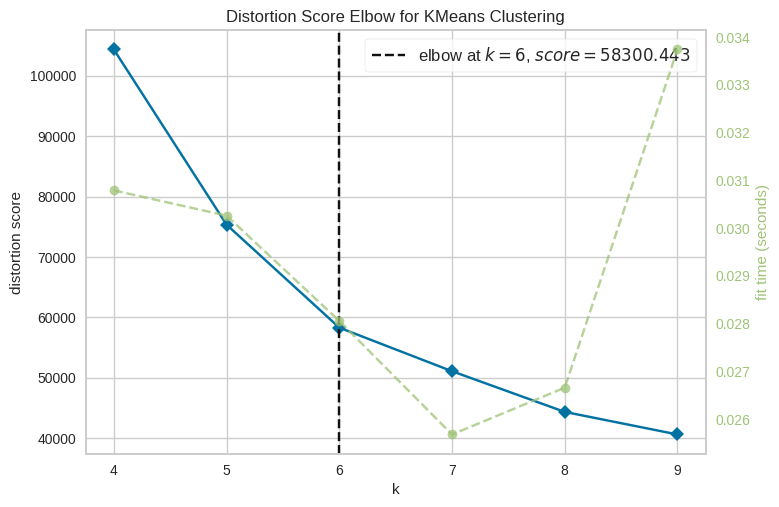

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init=10, random_state=1)
visualizer = KElbowVisualizer(model, k=(4,10))
# We using model k =(4,10) because it has the lowest score

visualizer.fit(X)
visualizer.show()
plt.show()

In [ ]:
# Still not sure what is the k by using the elbow, then we will use the silhouette to make sure

## Silhouette Score

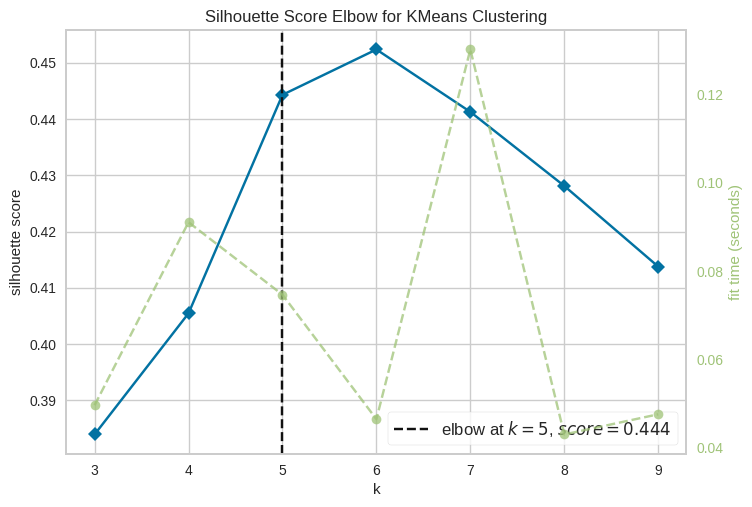

In [ ]:
model = KMeans(n_init=10, random_state=1)
visualizer = KElbowVisualizer(model, k=(3,10), metric='silhouette')
# We are using k = 3 because many results with either 2,3,4,or 5 have the same score (0.444)

visualizer.fit(X)
visualizer.show()
plt.show()

The results are either 5 or 6, so we will make 5 and 6 K-Means clusters to know which one is better

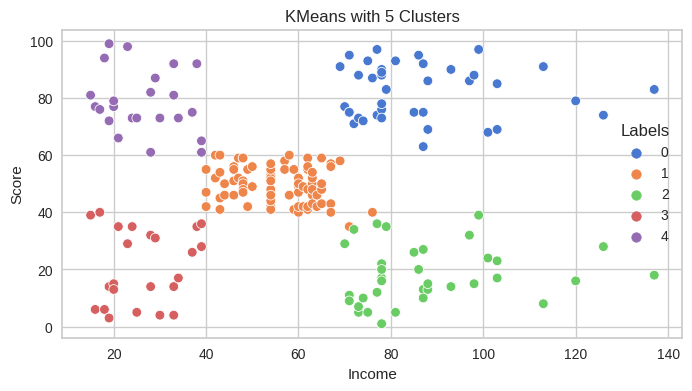

In [ ]:
km5 = KMeans(n_init= 10, n_clusters=5).fit(X)

# Add 'Labels' column using .loc
X.loc[:, 'Labels'] = km5.labels_

# Create the scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['Income'],
                y=X['Score'],
                hue=X['Labels'],
                palette=sns.color_palette('muted', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



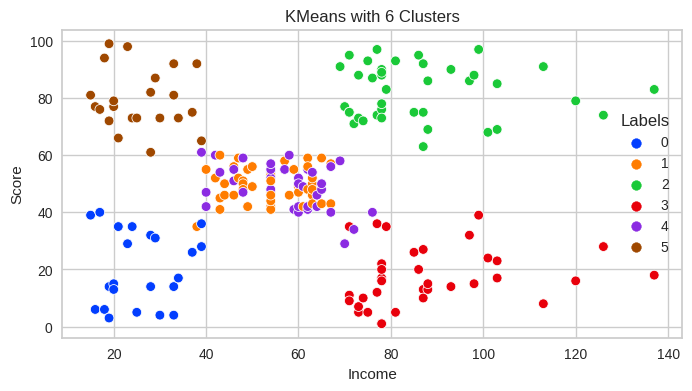

In [ ]:
# 6 Cluster
km6 = KMeans(n_clusters=6).fit(X)

# Add 'Labels' column using .loc
X.loc[:, 'Labels'] = km6.labels_

# Create the scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['Income'],
                y=X['Score'],
                hue=X['Labels'],
                palette=sns.color_palette('bright', 6))
plt.title('KMeans with 6 Clusters')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, km5.labels_)

# Based on the silhouette score, cluster 6 is better which has a higher score (0.45340805229425996) than cluster 5 (0.4456448771132384)
# However, based on the visualization, cluster 5 has better results than cluster 6 because the label 1 and 0 are overlapping, hence, we will use cluster 5

0.4456448771132384

## Result

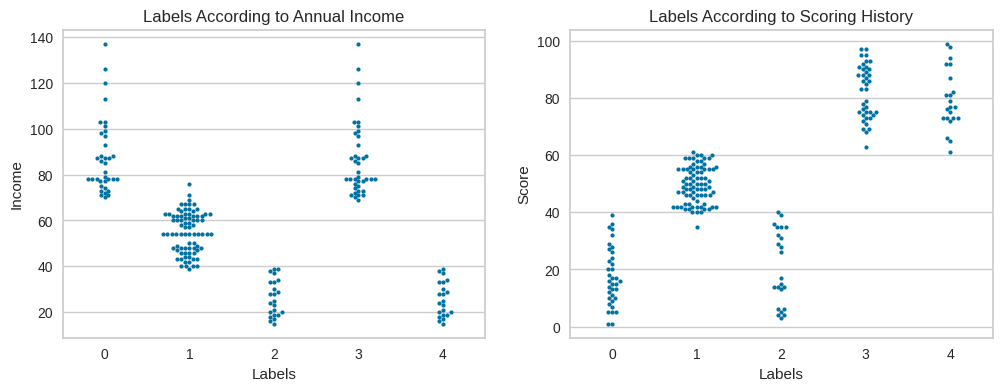

In [ ]:
# For better visualization based on the annual income and scoring history
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax, size=3, dodge=True)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax, size=3, dodge=True)
ax.set_title('Labels According to Scoring History')

plt.show()

In [ ]:
# initialize and fit the K-Means model
KM_5_clusters = KMeans(n_init=10, n_clusters=5, init='k-means++').fit(X)

KM5_clustered = X.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_

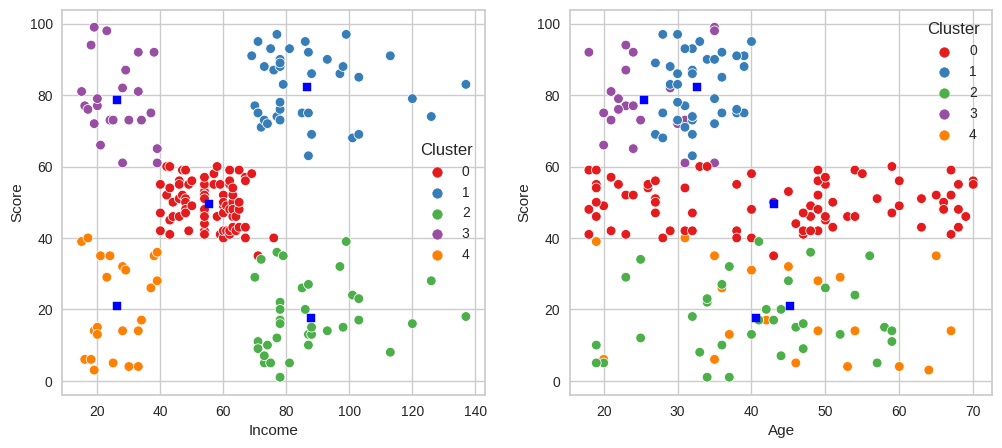

In [ ]:
# Let's visualize the income and age plus the centroids for each cluster
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot(x='Income', y='Score', data=KM5_clustered[KM5_clustered['Labels'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Score', data=KM5_clustered[KM5_clustered['Labels'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()


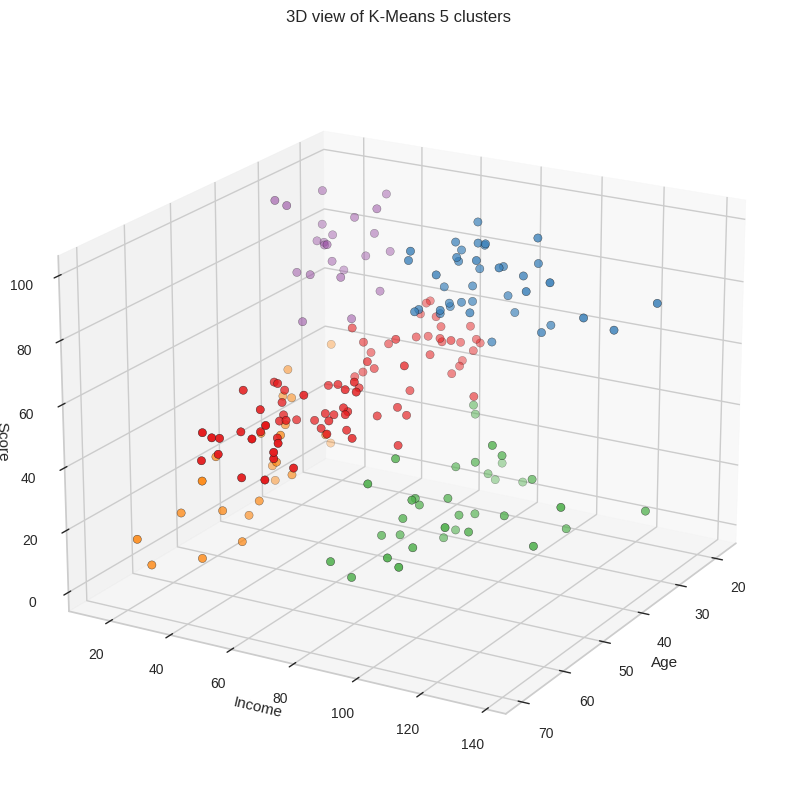

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Use the same color palette as the first code block
color_palette = sns.color_palette('Set1', len(KM_5_clusters.cluster_centers_))
cluster_colors = [color_palette[label] for label in KM5_clustered['Cluster']]

ax.scatter(KM5_clustered['Age'],
           KM5_clustered['Income'],
           KM5_clustered['Score'],
           c=cluster_colors,
           s=35, edgecolor='k')

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')
ax.set_title('3D view of K-Means 5 clusters')

ax.view_init(elev=20, azim=30)

plt.show()

In [ ]:
import plotly as py
import plotly.graph_objs as go

cluster_colors = [color_palette[label] for label in KM5_clustered['Cluster']]
def tracer(db, n, name):
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Score'],
        z = db[db['Cluster']==n]['Income'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Score'),
            zaxis = dict(title = 'Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

We can analyze our 5 clusters in detail now:

- `Label 0` is mid income and mid spending
- `Label 1` is high income and high spending
- `Label 2` is high income and low spending
- `Label 3` is low income and high spending
- `Label 4` is low income and low spending

# Agglomerative

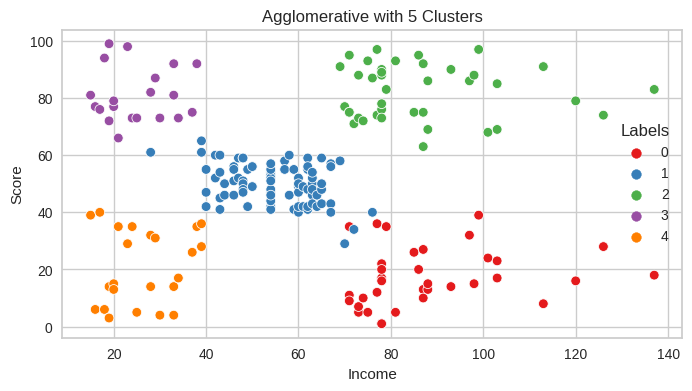

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['Income'],
                y=X['Score'],
                hue=X['Labels'],
                palette=sns.color_palette('Set1', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

## Dendogram

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X)

<ipython-input-133-b48731f4ffcb>:11: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



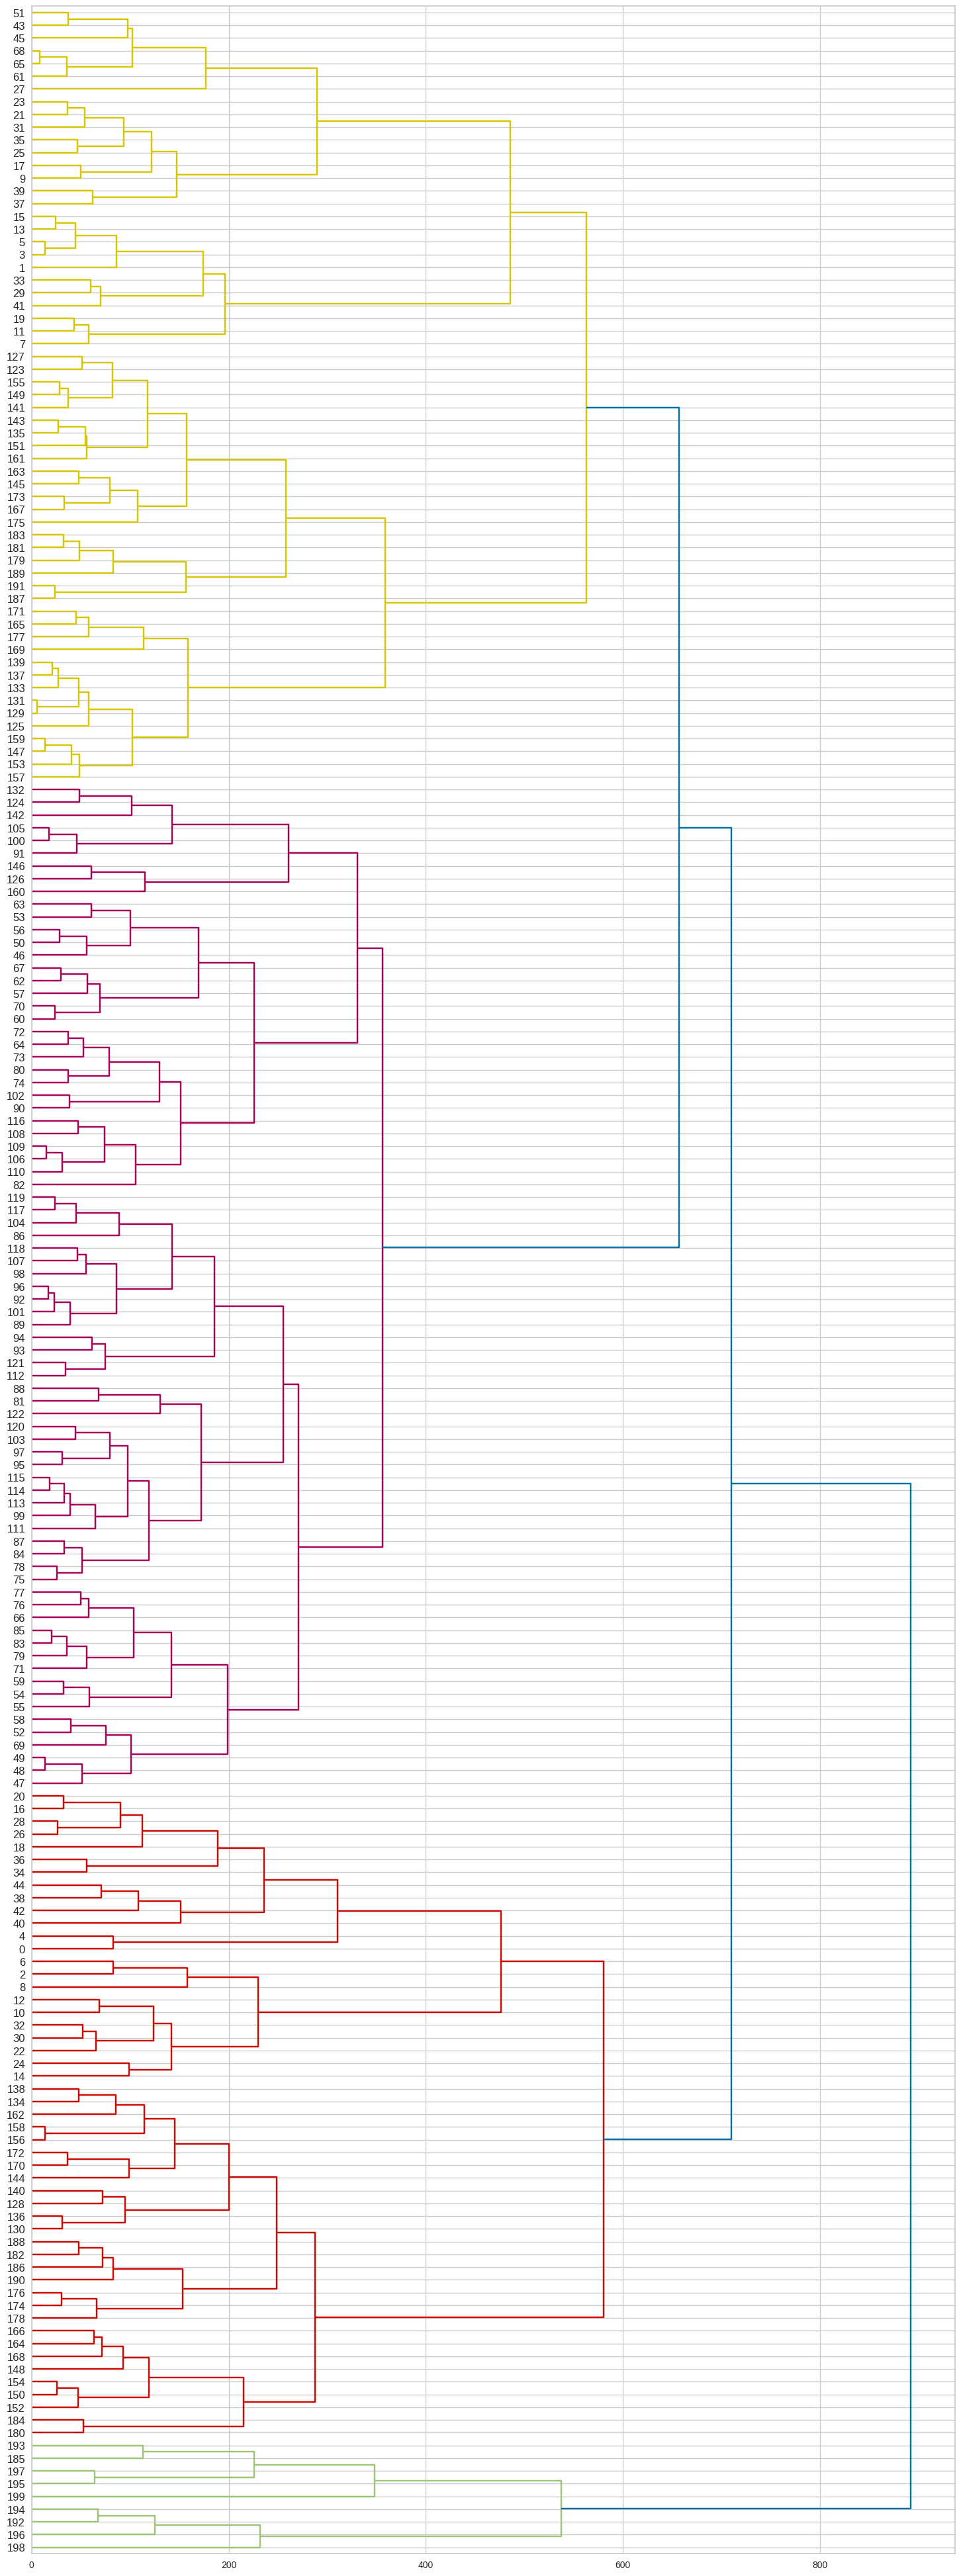

In [ ]:
from scipy.spatial.distance import pdist, squareform

dist_matrix = pdist(X, metric='euclidean')
dist_matrix_square = squareform(dist_matrix)
Z = hierarchy.linkage(dist_matrix_square, method='complete')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')
plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from itertools import product

# in DBSCAN, there are 2 major hyperparameters: eps & min samples
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

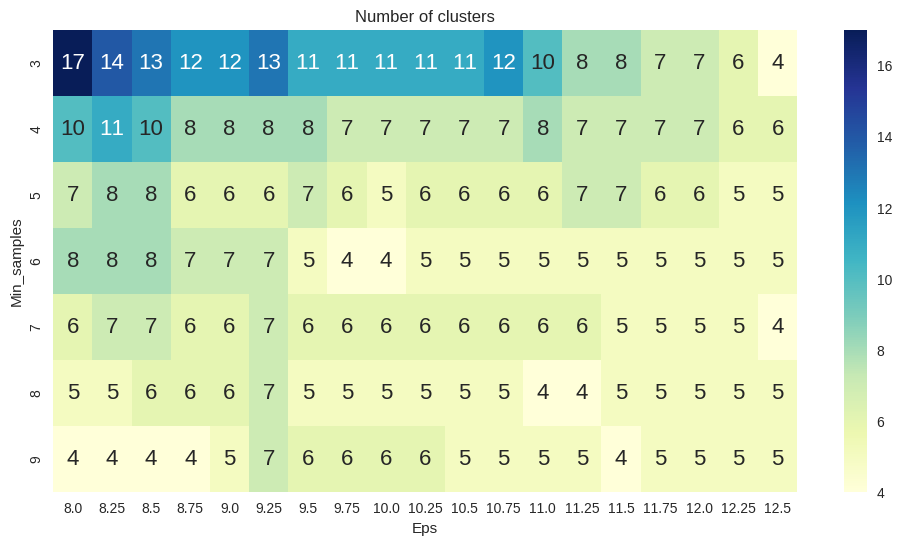

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

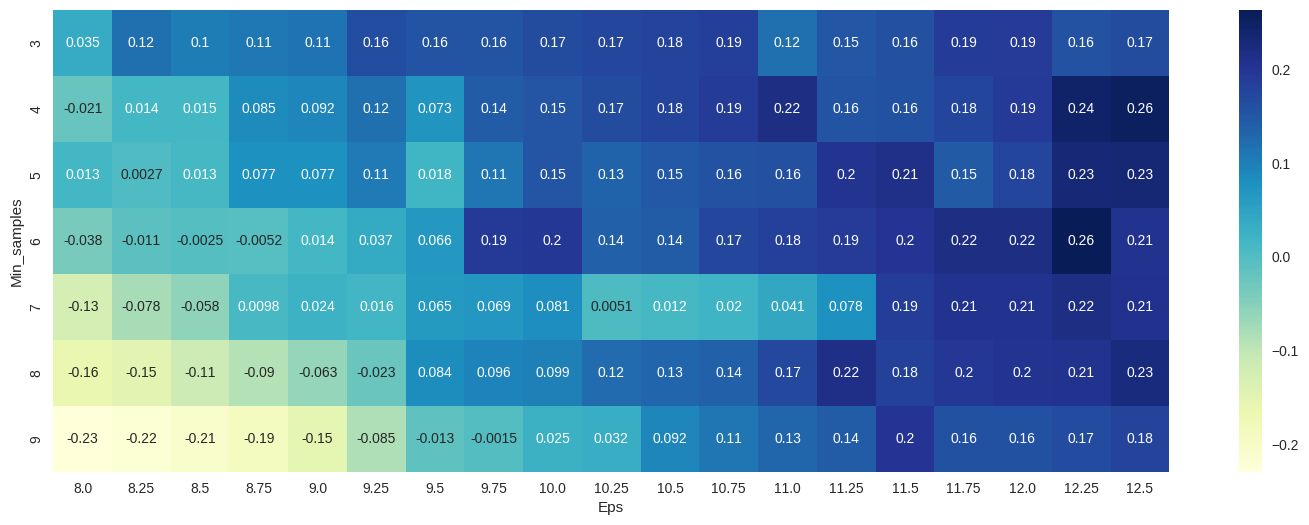

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
global_max = pivot_1.max().max()
print("Global Maximum:", global_max)

Global Maximum: 0.2555034489203779


Global maximum is 0.255 or 0.26 for eps=12.5 and min_samples=4.

In [ ]:
# Next we put the eps and the min_sample into DBSCAN
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)

DBSCAN_clustered = X.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


From this result, we can know that DBSCAN create 5 clusters + 1 (-1) which is the outlier

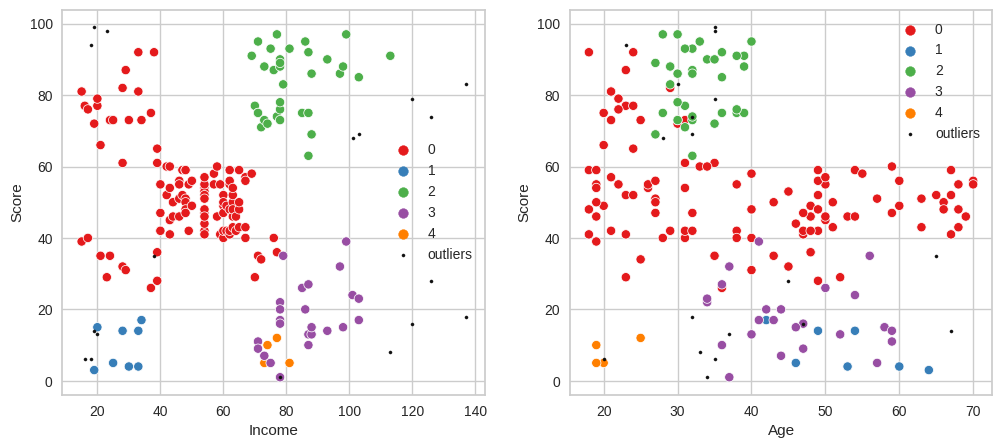

In [ ]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Income', y='Score',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Age', y='Score',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Income'], outliers['Score'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Score'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

# Wrapping Up

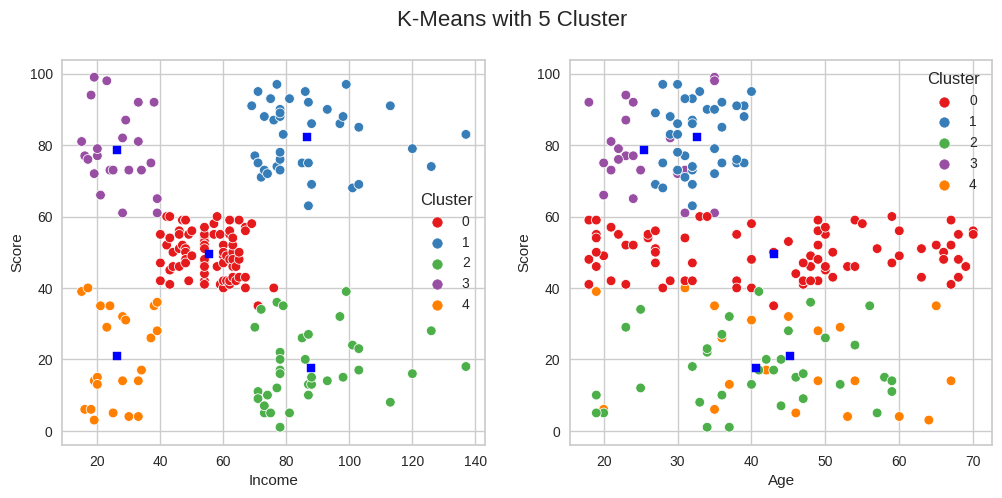

In [ ]:
fig1.suptitle('K-Means with 5 Cluster', fontsize=16)
fig1

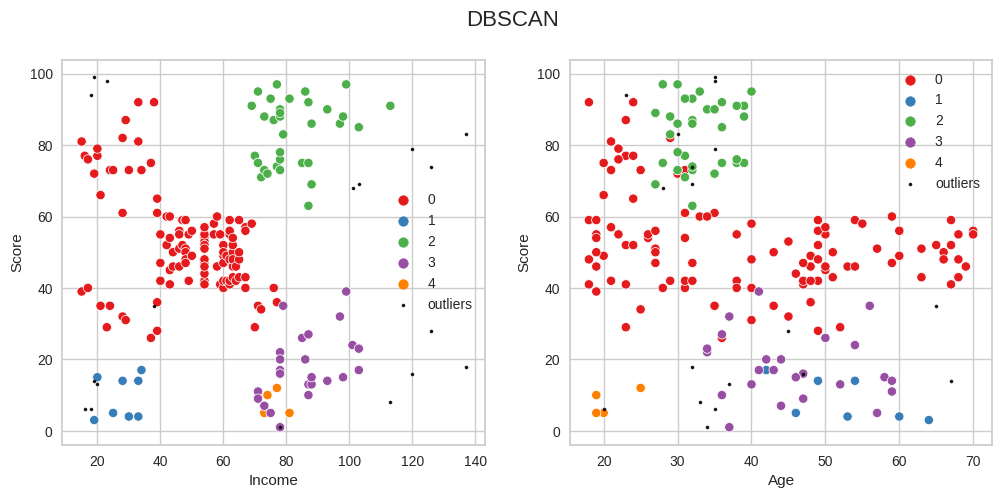

In [ ]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

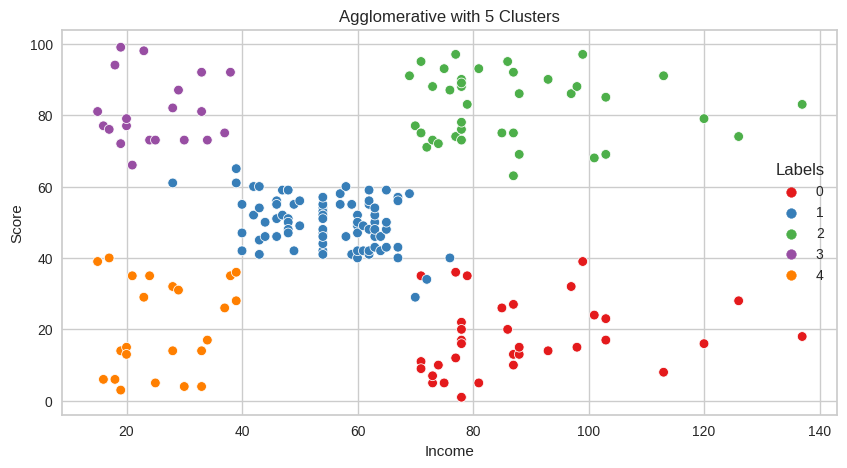

In [ ]:
X['Labels'] = agglom.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X['Income'],
                y=X['Score'],
                hue=X['Labels'],
                palette=sns.color_palette('Set1', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

* K-Means technique can tell us the centroids of each cluster and segment the customer, I have 2 options to choose between 5 or 6 clusters and I chose 5 because it's more logical by seeing the visualization.

* For DBSCAN, we can know the outliers and may use hyperparameters by using a heat plot for the respective parameter combinations. With a score of 0.26, we can assume that each cluster separated well because the range of this score is between -1 to 1, if the score is minus, it means that the algorithms didn't cluster the data. The result is, DBSCAN creates 5 clusters plus 1 outlier

* and the Agglomerative Cluster can show the hierarchical relationships between clusters.

Limitation: I can't make all the figures in the same colors and couldn't make the labels or clusters in the consistent order